In [11]:
#Import dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats


In [12]:
#import Census data and crime data
census_df = pd.read_csv("califpop_df.csv")
crime_df = pd.read_csv("county_crime_df.csv")
cali_boundaries_df = pd.read_csv("us-county-boundaries - California.csv")
housing_df = pd.read_csv("housing_df.csv")
housing_df.head()

,Unnamed: 0,REGNAME,CTYNAME,Median House Price 2017,Median House Price 2018,Median House Price 2019,Median House Price 042020,Median House Price 2020
0,196,West Region,Alameda County,600623,605146,610046,614728,616277
1,197,West Region,Alpine County,1778,1780,1785,1787,1788
2,198,West Region,Amador County,18203,18248,18310,18349,18362
3,199,West Region,Butte County,99177,99711,85787,86331,86511
4,200,West Region,Calaveras County,27988,28139,28239,28269,28279


In [13]:
#pull boundaries table and create a dataframe with only 3 of the needed columns
coordinates_df = cali_boundaries_df[['NAMELSAD','INTPTLAT','INTPTLON']]

#merge latitude and longitude of california counties with the crime table
crime_df = crime_df.merge(coordinates_df,how="left",left_on="County",right_on="NAMELSAD")
crime_df = crime_df.drop(columns=["NAMELSAD","Unnamed: 0"]).rename(columns={"INTPTLAT": "Latitude", "INTPTLON": "Longitude"})

crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442


In [14]:
#remove commas from population data and convert string to float
census_df[['Population 2016','Population 2017',
           'Population 2018','Population 2019','Population 2020']] = census_df[['Population 2016','Population 2017',
           'Population 2018','Population 2019','Population 2020']] .replace(',', '', regex=True).astype(float)
census_df.head()

,Unnamed: 0,COUNTY,County,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020
0,191,1,Alameda County,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0
1,192,3,Alpine County,1053.0,1116.0,1081.0,1113.0,1119.0
2,193,5,Amador County,37443.0,38549.0,39349.0,39693.0,40083.0
3,194,7,Butte County,226222.0,228700.0,230330.0,218726.0,212744.0
4,195,9,Calaveras County,45307.0,45658.0,45747.0,46119.0,46308.0


In [15]:
#merge population table to crime table
crime_df = crime_df.merge(census_df,how="left",on="County")
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Unnamed: 0,COUNTY,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,191,1,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,192,3,1053.0,1116.0,1081.0,1113.0,1119.0
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,193,5,37443.0,38549.0,39349.0,39693.0,40083.0
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,194,7,226222.0,228700.0,230330.0,218726.0,212744.0
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,195,9,45307.0,45658.0,45747.0,46119.0,46308.0


In [16]:
#Determine crime per capita for each year
crime_df['2016 Crime per Capita (%)'] = crime_df['2016']/crime_df['Population 2016']*100
crime_df['2017 Crime per Capita (%)'] = crime_df['2017']/crime_df['Population 2017']*100
crime_df['2018 Crime per Capita (%)'] = crime_df['2018']/crime_df['Population 2018']*100
crime_df['2019 Crime per Capita (%)'] = crime_df['2019']/crime_df['Population 2019']*100
crime_df['2020 Crime per Capita (%)'] = crime_df['2020']/crime_df['Population 2020']*100

crime_df = crime_df.drop(columns={"Unnamed: 0","COUNTY"})
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,Population 2018,Population 2019,Population 2020,2016 Crime per Capita (%),2017 Crime per Capita (%),2018 Crime per Capita (%),2019 Crime per Capita (%),2020 Crime per Capita (%)
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,1659824.0,1666596.0,1668412.0,1662323.0,4.255118,4.471739,4.155056,4.605937,4.116709
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,1053.0,1116.0,1081.0,1113.0,1119.0,3.798670,4.032258,3.792784,4.043127,2.949062
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,37443.0,38549.0,39349.0,39693.0,40083.0,2.043106,1.994864,1.832321,2.002872,1.858643
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,226222.0,228700.0,230330.0,218726.0,212744.0,3.673383,3.662003,3.091217,2.935636,2.606889
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,45307.0,45658.0,45747.0,46119.0,46308.0,1.840775,2.185816,2.310534,2.131443,1.995336


In [17]:
#merge housing data to crime table
crime_df = crime_df.merge(housing_df,how="left",left_on="County",right_on="CTYNAME")
crime_df.head()

,County,2016,2017,2018,2019,2020,Latitude,Longitude,Population 2016,Population 2017,...,2019 Crime per Capita (%),2020 Crime per Capita (%),Unnamed: 0,REGNAME,CTYNAME,Median House Price 2017,Median House Price 2018,Median House Price 2019,Median House Price 042020,Median House Price 2020
0,Alameda County,70242.0,74223.0,69248.0,76846.0,68433.0,37.647138,-121.912488,1650765.0,1659824.0,...,4.605937,4.116709,196,West Region,Alameda County,600623,605146,610046,614728,616277
1,Alpine County,40.0,45.0,41.0,45.0,33.0,38.621783,-119.798352,1053.0,1116.0,...,4.043127,2.949062,197,West Region,Alpine County,1778,1780,1785,1787,1788
2,Amador County,765.0,769.0,721.0,795.0,745.0,38.443550,-120.653856,37443.0,38549.0,...,2.002872,1.858643,198,West Region,Amador County,18203,18248,18310,18349,18362
3,Butte County,8310.0,8375.0,7120.0,6421.0,5546.0,39.665959,-121.601919,226222.0,228700.0,...,2.935636,2.606889,199,West Region,Butte County,99177,99711,85787,86331,86511
4,Calaveras County,834.0,998.0,1057.0,983.0,924.0,38.183900,-120.561442,45307.0,45658.0,...,2.131443,1.995336,200,West Region,Calaveras County,27988,28139,28239,28269,28279


In [7]:
#print dataframe into csv file
crime_df.to_csv('crime_per_capita_df.csv')

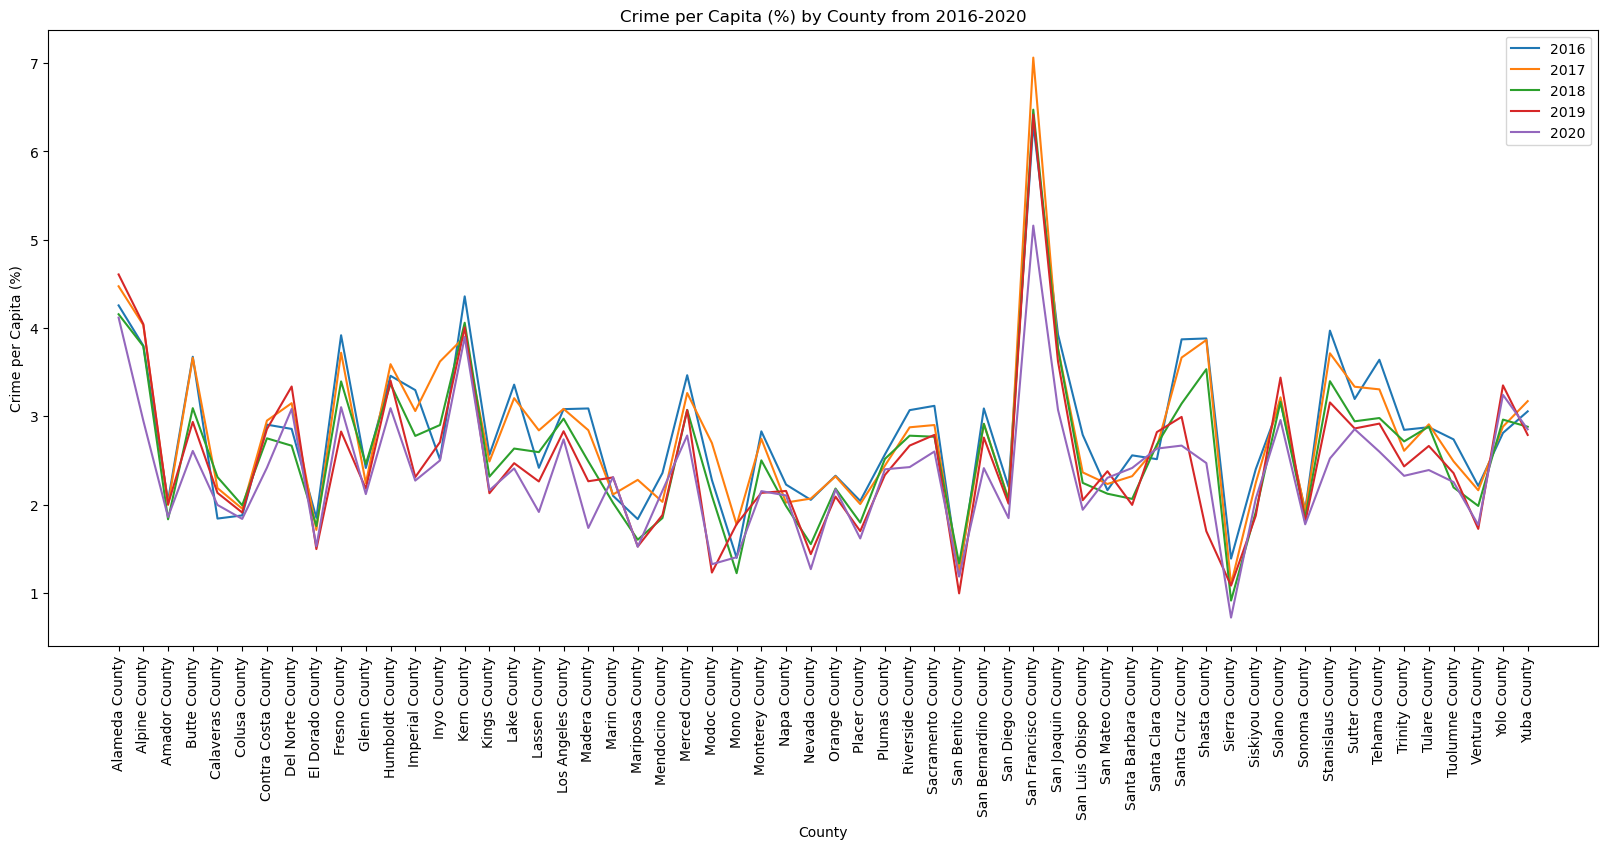

In [72]:
#create line graph based on crime per capita by county
crime_df.plot(kind="line",x='County',
              y=['2016 Crime per Capita (%)','2017 Crime per Capita (%)','2018 Crime per Capita (%)','2019 Crime per Capita (%)','2020 Crime per Capita (%)'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(20,8))
plt.title("Crime per Capita (%) by County from 2016-2020")
plt.ylabel("Crime per Capita (%)")
plt.xticks(crime_df.index,crime_df['County'],rotation=90)
plt.savefig("Crime per Capita (%) by County from 2016-2020")

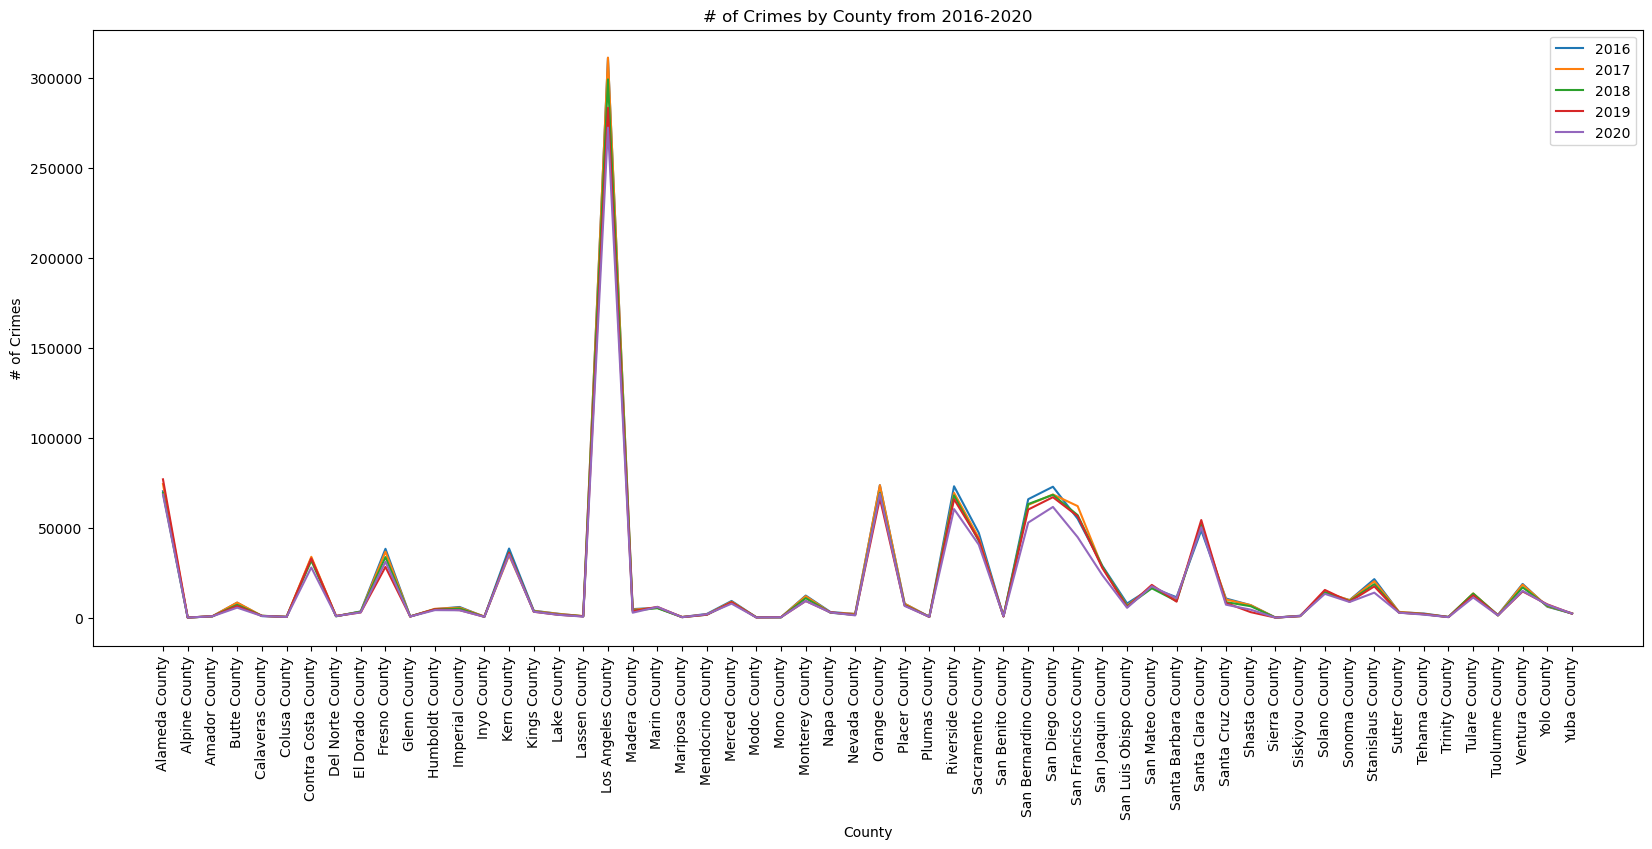

In [73]:
#create line graph based on # of crime by county
crime_df.plot(kind="line",x='County',
              y=['2016','2017','2018','2019','2020'], 
              label=["2016","2017","2018","2019","2020"],
              figsize=(20,8))
plt.title("# of Crimes by County from 2016-2020")
plt.ylabel("# of Crimes")
plt.xticks(crime_df.index,crime_df['County'],rotation=90)
plt.savefig("# of Crimes by County from 2017-2020.png")